In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the CSV file into a DataFrame
crime_data = pd.read_csv('C:/Users/manog/OneDrive/Desktop/601/Project/Part1_Crime_Beta_Filtered (2).csv')

#Head
crime_data.head()


,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,...,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y
0,70969,22J08752,10/27/2022 6:30:00 PM,4B,AGG. ASSAULT,NaN,BLUNT_OBJECT,434.0,M,43.0,...,NORTHEAST,NaN,FOUR BY FOUR,39.315394,-76.575720,"(39.315393999999998,-76.575720000000004)",OTHER/RESIDENTIAL,1,-76.575720,39.315394
1,120647,21F05950,6/20/2021 4:00:00 AM,4B,AGG. ASSAULT,NaN,PERSONAL_WEAPONS,426.0,M,28.0,...,NORTHEAST,NaN,FRANKFORD,39.342041,-76.545230,"(39.342041000000002,-76.545230000000004)",OTHER/RESIDENTIAL,1,-76.545230,39.342041
2,189128,19I08895,9/25/2019 4:12:00 AM,4C,AGG. ASSAULT,NaN,OTHER,513.0,M,16.0,...,NORTHERN,NaN,BETTER WAVERLY,39.320083,-76.609396,"(39.320083,-76.609396)",STREET,1,-76.609396,39.320083
3,183787,19L08326,12/27/2019 4:52:00 PM,4D,AGG. ASSAULT,NaN,HANDS,935.0,M,28.0,...,SOUTHERN,NaN,CARROLL - CAMDEN INDUSTRIAL AREA,39.275267,-76.642141,"(39.275267,-76.642141)",GAS STATION,1,-76.642141,39.275267
4,191616,19I04353,9/13/2019 3:40:00 AM,4A,AGG. ASSAULT,NaN,FIREARM,114.0,F,21.0,...,CENTRAL,NaN,DOWNTOWN,39.290373,-76.619956,"(39.290373,-76.619956)",APT/CONDO - OCCUPIED,1,-76.619956,39.290373


In [3]:
#question1
# Checking unique crime descriptions
unique_crimes = crime_data['Description'].unique()


unique_crimes


array(['AGG. ASSAULT', 'HOMICIDE', 'SHOOTING'], dtype=object)

In [4]:
#question2
crime_data['Year'] = pd.to_datetime(crime_data['CrimeDateTime']).dt.year

# Total crimes for the entire city in 2019 and 2023
total_crimes_2019 = crime_data[crime_data['Year'] == 2019].shape[0]
total_crimes_2023 = crime_data[crime_data['Year'] == 2023].shape[0]

# Absolute change in crime rate for the entire city
total_crime_change = total_crimes_2023 - total_crimes_2019
total_crimes_2019, total_crimes_2023, total_crime_change




(6745, 6823, 78)

In [5]:
#percentage change 
percentage_change = ((total_crimes_2023 - total_crimes_2019) / total_crimes_2023) * 100
print(f"Percentage change in violent crimes from 2019 to 2023: {percentage_change:.2f}%")

Percentage change in violent crimes from 2019 to 2023: 1.14%


In [6]:
#question3
crime_data['Year'] = pd.to_datetime(crime_data['CrimeDateTime']).dt.year

#Data for the years 2019 and 2023
filtered_data_2019 = crime_data[crime_data['Year'] == 2019].groupby('Neighborhood').size()
filtered_data_2023 = crime_data[crime_data['Year'] == 2023].groupby('Neighborhood').size()

# DataFrame from the series
crime_comparison = pd.DataFrame({
    '2019': filtered_data_2019,
    '2023': filtered_data_2023
})

#Cleaning the data 
# Fill missing values 
crime_comparison.fillna(0, inplace=True)

# Absolute changes 
crime_comparison['Absolute Change'] = crime_comparison['2023'] - crime_comparison['2019']

# Top increases and decreases
top_increases_simple = crime_comparison.sort_values('Absolute Change',ascending=False).head(5)
top_decreases_simple = crime_comparison.sort_values('Absolute Change').head(5)

top_increases_simple, top_decreases_simple



(                2019   2023  Absolute Change
 Neighborhood                                
 BROOKLYN       163.0  219.0             56.0
 BAYVIEW          7.0   35.0             28.0
 CHARLES NORTH   43.0   70.0             27.0
 CHERRY HILL     98.0  123.0             25.0
 FALLSTAFF       18.0   42.0             24.0,
                         2019  2023  Absolute Change
 Neighborhood                                       
 EAST BALTIMORE MIDWAY  110.0  54.0            -56.0
 CARROLLTON RIDGE       135.0  89.0            -46.0
 DUNBAR-BROADWAY        108.0  63.0            -45.0
 BROADWAY EAST          111.0  67.0            -44.0
 BEREA                   79.0  36.0            -43.0)

In [7]:
#a
# Summary DataFrame
top_changes = pd.concat([top_increases_simple, top_decreases_simple])
top_changes['Percentage Change'] = (top_changes['Absolute Change'] / top_changes['2019'].replace(0, pd.NA)) * 100
top_changes.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

top_changes



,2019,2023,Absolute Change,Percentage Change
Neighborhood,,,,
BROOKLYN,163.0,219.0,56.0,34.355828
BAYVIEW,7.0,35.0,28.0,400.000000
CHARLES NORTH,43.0,70.0,27.0,62.790698
CHERRY HILL,98.0,123.0,25.0,25.510204
FALLSTAFF,18.0,42.0,24.0,133.333333
EAST BALTIMORE MIDWAY,110.0,54.0,-56.0,-50.909091
CARROLLTON RIDGE,135.0,89.0,-46.0,-34.074074
DUNBAR-BROADWAY,108.0,63.0,-45.0,-41.666667
BROADWAY EAST,111.0,67.0,-44.0,-39.639640


In [8]:
#b
#Citywide Crime Summary
citywide_crime_summary = pd.DataFrame({
    'Year': ['2019', '2023'],
    'Total Crimes': [total_crimes_2019, total_crimes_2023],
    'Change': ['-', total_crime_change]
})
citywide_crime_summary.loc[1, 'Percentage Change'] = (total_crime_change / total_crimes_2023) * 100
citywide_crime_summary

,Year,Total Crimes,Change,Percentage Change
0,2019,6745,-,NaN
1,2023,6823,78,1.143192


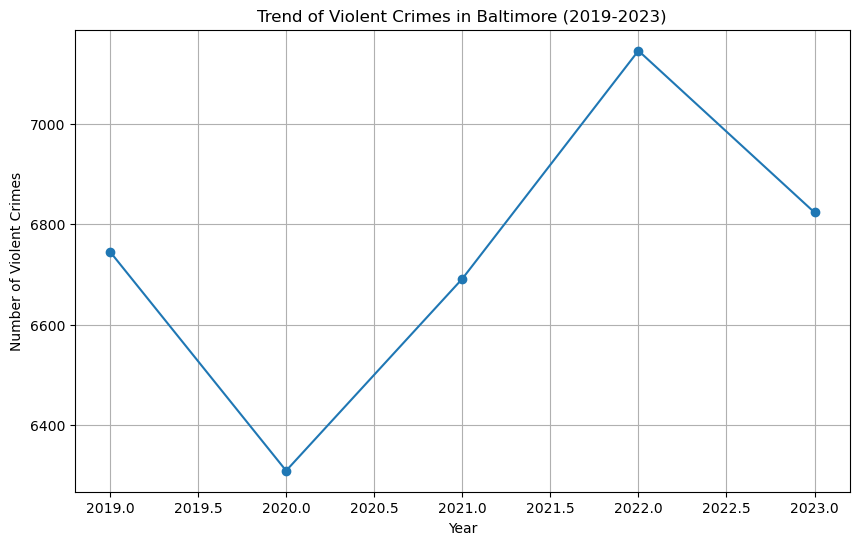

In [9]:
#c#i
import matplotlib.pyplot as plt
# 'CrimeDateTime' ==> datetime
crime_data['CrimeDateTime'] = pd.to_datetime(crime_data['CrimeDateTime'], errors='coerce')

crime_data['Year'] = crime_data['CrimeDateTime'].dt.year

# Group by the 'Year',sum of'Total_Incidents'
crime_counts_by_year = crime_data.groupby('Year')['Total_Incidents'].sum().reset_index()

# Filtering the  data for 2019 and 2023
filtered_crime_counts = crime_counts_by_year[(crime_counts_by_year['Year'] >= 2019) & (crime_counts_by_year['Year'] <= 2023)]

filtered_crime_counts = filtered_crime_counts.sort_values(by='Year')

# Extracting years and crime counts 
years = filtered_crime_counts['Year'].tolist()
crime_counts = filtered_crime_counts['Total_Incidents'].tolist()

#ploting the line graph 
plt.figure(figsize=(10, 6))
plt.plot(years, crime_counts, marker='o')
plt.title('Trend of Violent Crimes in Baltimore (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Violent Crimes')
plt.grid(True)
plt.show()


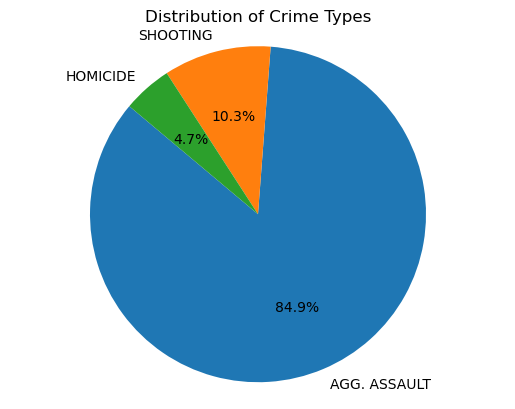

In [10]:
#c#ii
description_counts = crime_data['Description'].value_counts()

#Data for plotting
counts = description_counts.values  
labels = description_counts.index  

#Ploting the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Types')
plt.axis('equal')  
plt.show()


<Figure size 2000x1000 with 0 Axes>

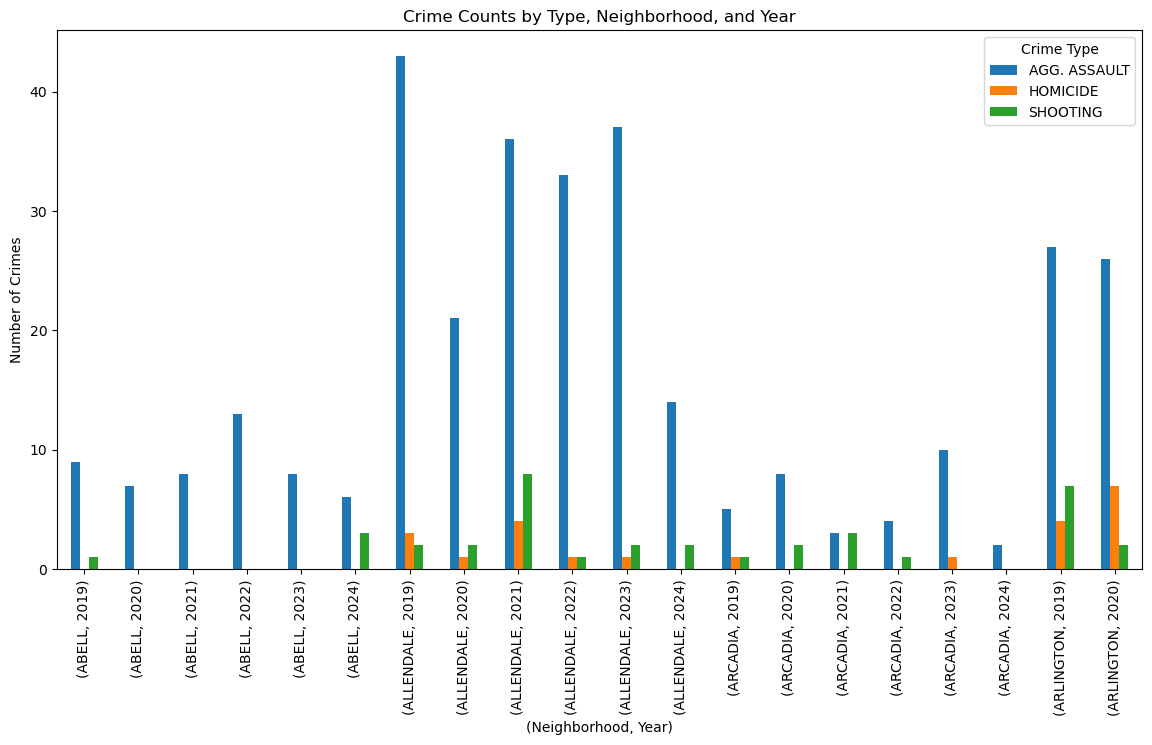

In [11]:
#c#iii
#Grouping the data
grouped_data = crime_data.groupby(['Year', 'Neighborhood', 'Description']).size().reset_index(name='Counts')

pivot_table_grouped = grouped_data.pivot_table(index=['Neighborhood', 'Year'], columns='Description', values='Counts', fill_value=0)

# Plotting the grouped bar graph 
plt.figure(figsize=(20, 10))

sample_data = pivot_table_grouped.head(20)
sample_data.plot(kind='bar', stacked=False, figsize=(14, 7))
plt.title('Crime Counts by Type, Neighborhood, and Year')
plt.ylabel('Number of Crimes')
plt.xlabel('(Neighborhood, Year)')
plt.xticks(rotation=90)
plt.legend(title='Crime Type')
plt.show()
